# 로지스틱회귀분석 (연령)

In [49]:
import pandas as pd
from statsmodels.formula.api import ols, logit
import numpy as np
from scipy import stats
import sys
import seaborn as sb
from matplotlib import pyplot as plt
import os
sys.path.append(r"C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석")
import 부분별_분석_모델

In [50]:
D = pd.read_excel(r'C:\Users\hanjieun_2\Documents\카카오톡 받은 파일\카테고리_소분류완료.xlsx', usecols=['(가)건강 만족도',
 '(나)가족의 수입 만족도',
 '(다)주거 환경 만족도',
 '(라)가족관계 만족도',
 '(마)직업 만족도',
 '(바)사회적 친분관계 만족도',
 '(사)여가생활 만족도',
 '삶의 사다리 점수',
 '연령'])
D

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령
0,6,2,1,3,3,2,3,3,78
1,5,2,4,4,4,4,4,4,75
2,4,5,2,4,2,4,4,3,81
3,4,2,2,3,2,3,2,2,83
4,9,4,2,4,2,4,3,4,59
...,...,...,...,...,...,...,...,...,...
3329,8,4,4,4,4,4,4,4,80
3330,9,4,4,4,4,4,4,3,80
3331,5,3,4,4,3,3,3,3,87
3332,8,4,3,4,4,4,4,4,80


In [53]:
D.describe()

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,6.116077,2.951410,3.042292,3.568086,3.787343,3.355129,3.622376,3.247750,67.693461
std,1.828376,0.994453,0.848400,0.635023,0.671798,0.682279,0.678762,0.718233,18.714306
min,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000
25%,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,57.000000
50%,6.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,74.000000
75%,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,82.000000
max,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,101.000000


In [55]:
def trans(x):
    if 0 <= x < 57:
        return 1
    elif 57 <= x < 74:
        return 2
    elif 74 <= x < 82:
        return 3 
    else:
        return 4

In [56]:
D['연령_범주']=D["연령"].apply(trans)

In [57]:
D

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령,연령_범주
0,6,2,1,3,3,2,3,3,78,3
1,5,2,4,4,4,4,4,4,75,3
2,4,5,2,4,2,4,4,3,81,3
3,4,2,2,3,2,3,2,2,83,4
4,9,4,2,4,2,4,3,4,59,2
...,...,...,...,...,...,...,...,...,...,...
3329,8,4,4,4,4,4,4,4,80,3
3330,9,4,4,4,4,4,4,3,80,3
3331,5,3,4,4,3,3,3,3,87,4
3332,8,4,3,4,4,4,4,4,80,3


In [269]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10,7)

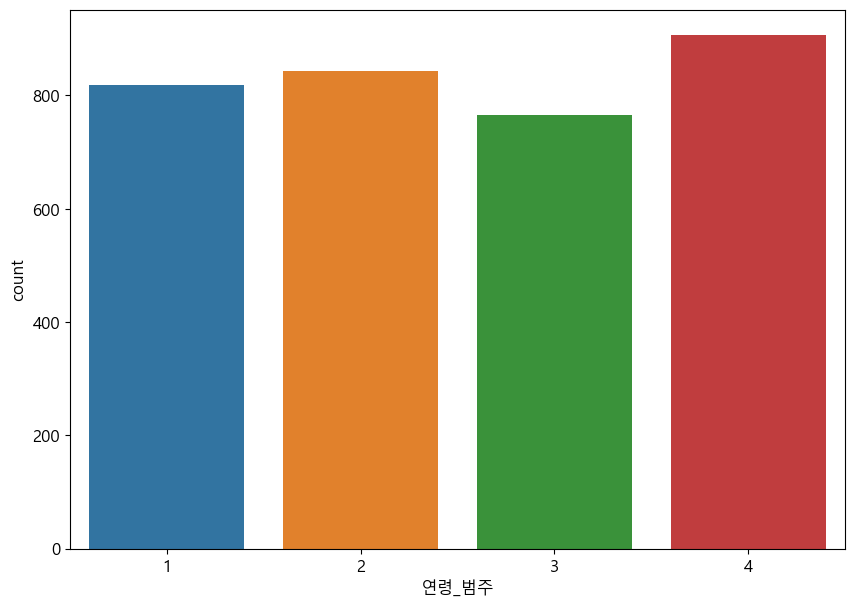

In [270]:
plt.figure()
sb.countplot(data=D, x=D['연령_범주'])
plt.show()
plt.close()

In [187]:
D['연령_범주'].value_counts()

연령_범주
4    906
2    844
1    819
3    765
Name: count, dtype: int64

In [58]:
def model_process(model,formula):
  #formula='삶의사다리점수_변형~건강만족도+가족의수입만족도+주거환경만족도+가족관계만족도+직업만족도+사회적친분관계만족도+여가생활만족도'
  test_df=model.pvalues.to_frame()
  if any(test_df>0.05):
    if formula[formula.find(test_df.sort_values(by=0,ascending=False).index[0])-1]=="~":
      formula=formula.replace(test_df.sort_values(by=0,ascending=False).index[0],"")
    else:
      formula=formula.replace("+"+test_df.sort_values(by=0,ascending=False).index[0],"")
    return formula
  else:
    return False

def lgt(data,구분컬럼명=None):
  model={}
  if 구분컬럼명:
    for i in data[구분컬럼명].unique():
      use_df=data[data[구분컬럼명]==i]
      use_col=[x for x in data.columns if x.find("만족도")!=-1]
      use_col.append("삶의 사다리 점수")
      use_col2=list(map(lambda x:x.split(")")[-1].replace(" ",""),use_col))
      use_df.rename(columns=dict(zip(use_col,use_col2)),inplace=True)
      use_df=use_df[use_col2]
      # 중상위 결과
      use_df["삶의사다리점수_변형"]=use_df["삶의사다리점수"].apply(lambda x:1 if x>use_df["삶의사다리점수"].mean() else 0)
      formula=f'삶의사다리점수_변형~{"+".join(use_df.columns[:-2])}'
      result1=logit(formula,data=use_df).fit()
      while bool(model_process(formula,result1)):
        formula=model_process(formula,result1)
        result1=logit(formula,data=use_df).fit() 
      #print(result.summary(),"\n","정확도 :",(result.pred_table()[0,0]+result.pred_table()[1,1])/result.pred_table().sum())
      #최상위 결과
      top_df=use_df[use_df["삶의사다리점수_변형"]==1]
      top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
      formula=f'삶의사다리점수_변형~{"+".join(use_df.columns[:-2])}'
      result2=logit(formula,data=top_df).fit()
      while bool(model_process(formula,result2)):
        formula=model_process(formula,result2)
        result2=logit(formula,data=top_df).fit()  
      #최하위 결과
      low_df=use_df[use_df["삶의사다리점수_변형"]==0]
      low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)
      formula=f'삶의사다리점수_변형~{"+".join(use_df.columns[:-2])}'
      result3=logit(formula,data=low_df).fit()
      while bool(model_process(formula,result3)):
        formula=model_process(formula,result3)
        result3=logit(formula,data=low_df).fit()
      ana_dc={"중상위":result1,"최상위":result2,"최하위":result3}
      model[i]=ana_dc
  else:
    use_df=data.copy()
    use_col=[x for x in data.columns if x.find("만족도")!=-1]
    use_col.append("삶의 사다리 점수")
    use_col2=list(map(lambda x:x.split(")")[-1].replace(" ",""),use_col))
    use_df.rename(columns=dict(zip(use_col,use_col2)),inplace=True)
    use_df=use_df[use_col2]
    # 중상위 결과
    use_df["삶의사다리점수_변형"]=use_df["삶의사다리점수"].apply(lambda x:1 if x>use_df["삶의사다리점수"].mean() else 0)
    formula=f'삶의사다리점수_변형~{"+".join(use_df.columns[:-2])}'
    result1=logit(formula,data=use_df).fit()
    while bool(model_process(formula,result1)):
      formula=model_process(formula,result1)
      result1=logit(formula,data=use_df).fit()
    #print(result.summary(),"\n","정확도 :",(result.pred_table()[0,0]+result.pred_table()[1,1])/result.pred_table().sum())
    #최상위 결과
    top_df=use_df[use_df["삶의사다리점수_변형"]==1]
    top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
    formula=f'삶의사다리점수_변형~{"+".join(use_df.columns[:-2])}'
    result2=logit(formula,data=top_df).fit()
    while bool(model_process(formula,result1)):
      formula=model_process(formula,result2)
      result2=logit(formula,data=top_df).fit() 
    #최하위 결과
    low_df=use_df[use_df["삶의사다리점수_변형"]==0]
    low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)
    formula=f'삶의사다리점수_변형~{"+".join(use_df.columns[:-2])}'
    result3=logit(formula,data=low_df).fit()
    while bool(model_process(formula,result3)):
      formula=model_process(formula,result3)
      result3=logit(formula,data=low_df).fit()
    ana_dc={"중상위":result1,"최상위":result2,"최하위":result3}
    return ana_dc
  return model

def aucc(model):
  return (model.pred_table()[0,0]+model.pred_table()[1,1])/model.pred_table().sum()

def model_process(formula,model):
  #formula='삶의사다리점수_변형~건강만족도+가족의수입만족도+주거환경만족도+가족관계만족도+직업만족도+사회적친분관계만족도+여가생활만족도'
  test_df=model.pvalues.to_frame()
  if any(test_df[0]>0.05):
    if formula[formula.find(test_df.sort_values(by=0,ascending=False).index[0])-1]=="~":
      formula=formula.replace(test_df.sort_values(by=0,ascending=False).index[0],"")
    else:
      formula=formula.replace("+"+test_df.sort_values(by=0,ascending=False).index[0],"")

### 연령 1

In [190]:
data= D[D['연령_범주']==1]
data

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령,연령_범주
5,8,4,4,4,4,4,4,4,48,1
7,5,2,4,4,2,4,4,4,39,1
14,5,3,3,3,3,3,3,3,41,1
15,7,5,4,4,3,4,4,4,48,1
19,10,2,3,3,4,2,3,4,40,1
...,...,...,...,...,...,...,...,...,...,...
3305,9,3,4,3,3,3,3,3,48,1
3306,10,4,4,4,4,4,4,4,51,1
3319,6,3,4,4,4,4,4,4,27,1
3321,6,4,3,3,3,4,3,3,43,1


In [205]:
data1 = data.filter(data.columns.difference(['연령','연령_범주']))
data1

,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,삶의 사다리 점수
5,4,4,4,4,4,4,4,8
7,2,4,4,2,4,4,4,5
14,3,3,3,3,3,3,3,5
15,5,4,4,3,4,4,4,7
19,2,3,3,4,2,3,4,10
...,...,...,...,...,...,...,...,...
3305,3,4,3,3,3,3,3,9
3306,4,4,4,4,4,4,4,10
3319,3,4,4,4,4,4,4,6
3321,4,3,3,3,4,3,3,6


In [206]:
result1=부분별_분석_모델.lgt(data1)

Optimization terminated successfully.
         Current function value: 0.538913
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540132
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633146
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584568
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584657
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587550
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.590350
         Iterations 6


C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


In [207]:
result1

{'중상위': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x1c30bdbac90>,
 '최상위': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x1c308f01090>,
 '최하위': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x1c30b981d50>}

### 1) 최상위

In [208]:
result1['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  457
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.06305
Time:                        16:31:47   Log-Likelihood:                -289.35
converged:                       True   LL-Null:                       -308.82
Covariance Type:            nonrobust   LLR p-value:                 2.008e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9238      1.219     -4.860      0.000      -8.313      -3.535
건강만족도          0.2689      0.136      1.985      0.047       0.003       0.535
가족의수입만족도      -0.2536      0.152     -1.665      0.096      -0.552       0.045
주거환경만족도        0.1714      0.194      0.882      0.378      -0.209       0.552
가족관계만족도        0.3488      0.201      1.737      0.082      -0.045       0.742
직업만족도          0.5890      0.200      2.939      0.003       0.196       0.982
사회적친분관계만족도     0.3490      0.238      1.468      0.142      -0.117       0.815
여가생활만족도        0.1584      0.168      0.943      0.345      -0.171       0.487
==============================================================================
"""

In [209]:
부분별_분석_모델.aucc(result1["최상위"])

0.6455142231947484

#### 최상위 2차 회귀분석

In [210]:
result1__high_2차=부분별_분석_모델.lgt(data1[data1.columns.difference(['(나)가족의 수입 만족도','(다)주거 환경 만족도','(바)사회적 친분관계 만족도','(사)여가생활 만족도'])])

Optimization terminated successfully.
         Current function value: 0.573546
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.640138
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597270
         Iterations 5


C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


In [212]:
result1__high_2차['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  457
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.05270
Time:                        16:33:11   Log-Likelihood:                -292.54
converged:                       True   LL-Null:                       -308.82
Covariance Type:            nonrobust   LLR p-value:                 4.010e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6095      0.967     -4.766      0.000      -6.505      -2.714
건강만족도          0.2789      0.130      2.139      0.032       0.023       0.534
가족관계만족도        0.4300      0.187      2.298      0.022       0.063       0.797
직업만족도          0.5956      0.179      3.335      0.001       0.246       0.946
==============================================================================
"""

In [213]:
부분별_분석_모델.aucc(result1_high_2차["최상위"])

0.7074148296593187

#### 2) 중상위

중상위 1차 로지스틱회귀분석

In [158]:
result1['중상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  906
Model:                          Logit   Df Residuals:                      900
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.1674
Time:                        16:16:12   Log-Likelihood:                -518.96
converged:                       True   LL-Null:                       -623.31
Covariance Type:            nonrobust   LLR p-value:                 3.909e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4364      0.661    -11.244      0.000      -8.733      -6.140
건강만족도          0.4363      0.095      4.600      0.000       0.250       0.622
가족의수입만족도       0.4618      0.110      4.195      0.000       0.246       0.678
가족관계만족도        0.5144      0.139      3.694      0.000       0.241       0.787
사회적친분관계만족도     0.5792      0.143      4.058      0.000       0.299       0.859
여가생활만족도        0.3892      0.137      2.849      0.004       0.121       0.657
==============================================================================
"""

In [214]:
부분별_분석_모델.aucc(result1["중상위"])

0.7362637362637363

#### 3) 최하위

In [215]:
result1['최하위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  362
Model:                          Logit   Df Residuals:                      357
Method:                           MLE   Df Model:                            4
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.1474
Time:                        16:34:33   Log-Likelihood:                -213.71
converged:                       True   LL-Null:                       -250.65
Covariance Type:            nonrobust   LLR p-value:                 3.432e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4410      0.901     -7.147      0.000      -8.207      -4.675
건강만족도          0.6128      0.137      4.468      0.000       0.344       0.882
주거환경만족도        0.3903      0.175      2.228      0.026       0.047       0.734
가족관계만족도        0.5327      0.184      2.895      0.004       0.172       0.893
직업만족도          0.3606      0.177      2.034      0.042       0.013       0.708
==============================================================================
"""

In [216]:
부분별_분석_모델.aucc(result1["최하위"])

0.6878453038674033

*******************

### 연령 2

### 1) 최상위

In [232]:
data2= D[D['연령_범주']==2]
data2

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령,연령_범주
4,9,4,2,4,2,4,3,4,59,2
6,5,2,4,4,2,4,4,4,62,2
9,8,4,4,4,4,4,3,2,69,2
13,5,3,3,3,3,3,3,3,68,2
18,10,2,3,3,4,2,3,4,66,2
...,...,...,...,...,...,...,...,...,...,...
3307,6,3,3,3,3,3,4,4,57,2
3312,6,2,3,4,4,3,2,2,71,2
3314,8,3,2,4,2,4,3,3,71,2
3320,4,2,2,2,2,2,3,3,71,2


In [233]:
data2 = data2.filter(data2.columns.difference(['연령','연령_범주']))
data2

,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,삶의 사다리 점수
4,4,2,4,2,4,3,4,9
6,2,4,4,2,4,4,4,5
9,4,4,4,4,4,3,2,8
13,3,3,3,3,3,3,3,5
18,2,3,3,4,2,3,4,10
...,...,...,...,...,...,...,...,...
3307,3,3,3,3,3,4,4,6
3312,2,3,4,4,3,2,2,6
3314,3,2,4,2,4,3,3,8
3320,2,2,2,2,2,3,3,4


In [234]:
result2=부분별_분석_모델.lgt(data2)

Optimization terminated successfully.
         Current function value: 0.522209
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523198
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633602
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518725
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518919
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.521823
         Iterations 6


C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


#### 연령 2 최상위 1차 로지스틱 회귀분석 

In [235]:
result2['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  380
Model:                          Logit   Df Residuals:                      372
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.07022
Time:                        16:37:15   Log-Likelihood:                -240.77
converged:                       True   LL-Null:                       -258.95
Covariance Type:            nonrobust   LLR p-value:                 6.179e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7080      1.373     -4.157      0.000      -8.399      -3.017
건강만족도          0.2993      0.131      2.280      0.023       0.042       0.557
가족의수입만족도      -0.0814      0.142     -0.574      0.566      -0.360       0.197
주거환경만족도        0.1104      0.214      0.515      0.606      -0.310       0.530
가족관계만족도        0.0648      0.205      0.316      0.752      -0.337       0.466
직업만족도          0.8873      0.232      3.820      0.000       0.432       1.342
사회적친분관계만족도     0.2780      0.245      1.134      0.257      -0.202       0.758
여가생활만족도        0.0549      0.188      0.292      0.770      -0.313       0.423
==============================================================================
"""

In [236]:
부분별_분석_모델.aucc(result2["최상위"])

0.6552631578947369

#### 연령2 2차 회귀분석

In [237]:
result2_high_2차=부분별_분석_모델.lgt(data2[data2.columns.difference(['(나)가족의 수입 만족도','(다)주거 환경 만족도','(라)가족관계 만족도','(사)여가생활 만족도'])])

Optimization terminated successfully.
         Current function value: 0.546283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634520
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.543483
         Iterations 6


C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


In [238]:
result2_high_2차['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  380
Model:                          Logit   Df Residuals:                      376
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.06887
Time:                        16:37:21   Log-Likelihood:                -241.12
converged:                       True   LL-Null:                       -258.95
Covariance Type:            nonrobust   LLR p-value:                 8.798e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2570      1.112     -4.728      0.000      -7.436      -3.078
건강만족도          0.2976      0.128      2.323      0.020       0.047       0.549
직업만족도          0.8869      0.219      4.055      0.000       0.458       1.316
사회적친분관계만족도     0.3169      0.228      1.392      0.164      -0.129       0.763
==============================================================================
"""

In [239]:
부분별_분석_모델.aucc(result2_high_2차['최상위'])

0.65

### 2) 중상위

In [240]:
result2['중상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  844
Model:                          Logit   Df Residuals:                      837
Method:                           MLE   Df Model:                            6
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.2397
Time:                        16:37:25   Log-Likelihood:                -441.58
converged:                       True   LL-Null:                       -580.83
Covariance Type:            nonrobust   LLR p-value:                 3.289e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9787      0.776    -12.865      0.000     -11.499      -8.459
건강만족도          0.3765      0.096      3.914      0.000       0.188       0.565
가족의수입만족도       0.3012      0.109      2.763      0.006       0.088       0.515
가족관계만족도        0.5112      0.142      3.612      0.000       0.234       0.789
직업만족도          0.5129      0.152      3.365      0.001       0.214       0.812
사회적친분관계만족도     0.6504      0.171      3.795      0.000       0.315       0.986
여가생활만족도        0.4512      0.133      3.402      0.001       0.191       0.711
==============================================================================
"""

In [241]:
부분별_분석_모델.aucc(result2["중상위"])

0.7251184834123223

### 3) 최하위

In [242]:
result2['최하위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  464
Model:                          Logit   Df Residuals:                      458
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.1643
Time:                        16:37:28   Log-Likelihood:                -242.13
converged:                       True   LL-Null:                       -289.74
Covariance Type:            nonrobust   LLR p-value:                 5.340e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8790      0.795     -7.394      0.000      -7.437      -4.321
건강만족도          0.4820      0.130      3.709      0.000       0.227       0.737
주거환경만족도        0.3425      0.161      2.126      0.033       0.027       0.658
가족관계만족도        0.3588      0.156      2.305      0.021       0.054       0.664
직업만족도          0.4177      0.186      2.243      0.025       0.053       0.783
여가생활만족도        0.5760      0.179      3.225      0.001       0.226       0.926
==============================================================================
"""

In [243]:
부분별_분석_모델.aucc(result2["최하위"])

0.7629310344827587

*********************
### 연령 3

In [244]:
data3= D[D['연령_범주']==3]
data3

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령,연령_범주
0,6,2,1,3,3,2,3,3,78,3
1,5,2,4,4,4,4,4,4,75,3
2,4,5,2,4,2,4,4,3,81,3
8,6,4,3,4,4,3,3,3,80,3
16,1,2,3,2,2,3,2,2,77,3
...,...,...,...,...,...,...,...,...,...,...
3325,6,2,2,4,4,4,4,4,77,3
3328,8,3,4,4,4,4,4,3,81,3
3329,8,4,4,4,4,4,4,4,80,3
3330,9,4,4,4,4,4,4,3,80,3


In [245]:
data3 = data3.filter(data3.columns.difference(['연령','연령_범주']))
data3

,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,삶의 사다리 점수
0,2,1,3,3,2,3,3,6
1,2,4,4,4,4,4,4,5
2,5,2,4,2,4,4,3,4
8,4,3,4,4,3,3,3,6
16,2,3,2,2,3,2,2,1
...,...,...,...,...,...,...,...,...
3325,2,2,4,4,4,4,4,6
3328,3,4,4,4,4,4,3,8
3329,4,4,4,4,4,4,4,8
3330,4,4,4,4,4,4,3,9


In [246]:
result3=부분별_분석_모델.lgt(data3)

Optimization terminated successfully.
         Current function value: 0.564083
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565167
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566388
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619588
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603530
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603965
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.604671
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606587
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609812
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615628
  

C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


### 1) 최상위

In [247]:
result3['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  436
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.05741
Time:                        16:37:44   Log-Likelihood:                -270.14
converged:                       True   LL-Null:                       -286.59
Covariance Type:            nonrobust   LLR p-value:                 2.756e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1042      1.220     -5.004      0.000      -8.495      -3.714
건강만족도          0.1137      0.120      0.945      0.345      -0.122       0.349
가족의수입만족도       0.3302      0.137      2.417      0.016       0.062       0.598
주거환경만족도        0.2563      0.240      1.067      0.286      -0.215       0.727
가족관계만족도        0.1972      0.212      0.929      0.353      -0.219       0.613
직업만족도          0.2069      0.198      1.045      0.296      -0.181       0.595
사회적친분관계만족도     0.2689      0.216      1.246      0.213      -0.154       0.692
여가생활만족도        0.1978      0.182      1.086      0.277      -0.159       0.555
==============================================================================
"""

In [248]:
부분별_분석_모델.aucc(result3["최상위"])

0.6674311926605505

In [249]:
result3_high_2차=부분별_분석_모델.lgt(data3[data3.columns.difference(['(가)건강 만족도','(라)가족관계 만족도','(마)직업 만족도','(사)여가생활 만족도'])])

Optimization terminated successfully.
         Current function value: 0.608287
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625791
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637043
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640535
         Iterations 5


C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


In [250]:
result3_high_2차['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  436
Model:                          Logit   Df Residuals:                      432
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.04797
Time:                        16:39:53   Log-Likelihood:                -272.84
converged:                       True   LL-Null:                       -286.59
Covariance Type:            nonrobust   LLR p-value:                 4.630e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9576      1.057     -4.689      0.000      -7.030      -2.885
가족의수입만족도       0.4136      0.131      3.166      0.002       0.158       0.670
주거환경만족도        0.3445      0.235      1.465      0.143      -0.117       0.805
사회적친분관계만족도     0.4737      0.189      2.501      0.012       0.102       0.845
==============================================================================
"""

In [251]:
부분별_분석_모델.aucc(result3_high_2차["최상위"])

0.6376146788990825

### 2) 중상위

In [252]:
result3['중상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  765
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.1711
Time:                        16:40:01   Log-Likelihood:                -433.29
converged:                       True   LL-Null:                       -522.75
Covariance Type:            nonrobust   LLR p-value:                 9.072e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4697      0.731    -10.220      0.000      -8.902      -6.037
건강만족도          0.4376      0.097      4.496      0.000       0.247       0.628
주거환경만족도        0.4389      0.146      3.002      0.003       0.152       0.725
가족관계만족도        0.4296      0.145      2.954      0.003       0.145       0.715
직업만족도          0.3193      0.142      2.242      0.025       0.040       0.598
여가생활만족도        0.7431      0.133      5.595      0.000       0.483       1.003
==============================================================================
"""

In [253]:
부분별_분석_모델.aucc(result3["중상위"])

0.6954248366013072

### 3) 최하위

In [254]:
result3['최하위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  329
Model:                          Logit   Df Residuals:                      326
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.1053
Time:                        16:40:14   Log-Likelihood:                -202.54
converged:                       True   LL-Null:                       -226.39
Covariance Type:            nonrobust   LLR p-value:                 4.404e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4839      0.762     -5.886      0.000      -5.977      -2.991
건강만족도          0.5242      0.143      3.658      0.000       0.243       0.805
가족관계만족도        0.9785      0.184      5.307      0.000       0.617       1.340
==============================================================================
"""

In [255]:
부분별_분석_모델.aucc(result3["최하위"])

0.6778115501519757

*************************
### 연령4

In [256]:
data4= D[D['연령_범주']==4]
data4

,삶의 사다리 점수,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,연령,연령_범주
3,4,2,2,3,2,3,2,2,83,4
10,6,4,3,4,4,3,4,3,82,4
11,6,4,2,3,4,3,4,4,87,4
12,4,2,3,4,4,3,3,3,86,4
17,5,3,3,4,4,4,4,4,82,4
...,...,...,...,...,...,...,...,...,...,...
3315,7,2,3,4,4,3,3,3,84,4
3318,7,4,4,4,4,4,4,4,86,4
3327,7,3,3,4,4,4,3,3,83,4
3331,5,3,4,4,3,3,3,3,87,4


In [257]:
data4 = data4.filter(data4.columns.difference(['연령','연령_범주']))
data4

,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,삶의 사다리 점수
3,2,2,3,2,3,2,2,4
10,4,3,4,4,3,4,3,6
11,4,2,3,4,3,4,4,6
12,2,3,4,4,3,3,3,4
17,3,3,4,4,4,4,4,5
...,...,...,...,...,...,...,...,...
3315,2,3,4,4,3,3,3,7
3318,4,4,4,4,4,4,4,7
3327,3,3,4,4,4,3,3,7
3331,3,4,4,3,3,3,3,5


In [258]:
result4=부분별_분석_모델.lgt(data4)

Optimization terminated successfully.
         Current function value: 0.570917
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571267
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572807
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.636356
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636411
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636616
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636898
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637613
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641696
  

C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


### 1) 최상위

In [259]:
result4['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  499
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.07661
Time:                        16:40:47   Log-Likelihood:                -280.92
converged:                       True   LL-Null:                       -304.23
Covariance Type:            nonrobust   LLR p-value:                 6.636e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1399      1.326     -6.137      0.000     -10.740      -5.540
건강만족도          0.1390      0.125      1.110      0.267      -0.106       0.384
가족의수입만족도       0.3928      0.151      2.603      0.009       0.097       0.689
주거환경만족도        0.4695      0.251      1.867      0.062      -0.023       0.962
가족관계만족도        0.2468      0.230      1.071      0.284      -0.205       0.699
직업만족도          0.3517      0.193      1.820      0.069      -0.027       0.730
사회적친분관계만족도     0.3507      0.221      1.590      0.112      -0.082       0.783
여가생활만족도        0.0990      0.185      0.537      0.591      -0.263       0.461
==============================================================================
"""

In [260]:
부분별_분석_모델.aucc(result4["최상위"])

0.7374749498997996

연령 4 최상위 2차 로지스틱회귀분석 실시

In [261]:
result4_high_2차=부분별_분석_모델.lgt(data4[data4.columns.difference(['(가)건강 만족도','(라)가족관계 만족도','(바)사회적 친분관계 만족도','(사)여가생활 만족도'])])

Optimization terminated successfully.
         Current function value: 0.616423
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570650
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.643920
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643962
         Iterations 5


C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df["삶의사다리점수_변형"]=top_df["삶의사다리점수"].apply(lambda x:1 if x>top_df["삶의사다리점수"].mean() else 0)
C:\Users\hanjieun_2\Desktop\빅데이터분석\data_analysis\데이터분석\부분별_분석_모델.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df["삶의사다리점수_변형"]=low_df["삶의사다리점수"].apply(lambda x:1 if x>low_df["삶의사다리점수"].mean() else 0)


In [262]:
result4_high_2차['최상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  499
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.06400
Time:                        16:41:20   Log-Likelihood:                -284.75
converged:                       True   LL-Null:                       -304.23
Covariance Type:            nonrobust   LLR p-value:                 1.785e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4627      1.070     -6.041      0.000      -8.560      -4.366
가족의수입만족도       0.4724      0.143      3.306      0.001       0.192       0.753
주거환경만족도        0.5732      0.243      2.358      0.018       0.097       1.050
직업만족도          0.5497      0.177      3.101      0.002       0.202       0.897
==============================================================================
"""

In [263]:
부분별_분석_모델.aucc(result4_high_2차['최상위'])

0.7074148296593187

### 2) 중상위

In [264]:
result4['중상위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  906
Model:                          Logit   Df Residuals:                      900
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                  0.1674
Time:                        16:42:00   Log-Likelihood:                -518.96
converged:                       True   LL-Null:                       -623.31
Covariance Type:            nonrobust   LLR p-value:                 3.909e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4364      0.661    -11.244      0.000      -8.733      -6.140
건강만족도          0.4363      0.095      4.600      0.000       0.250       0.622
가족의수입만족도       0.4618      0.110      4.195      0.000       0.246       0.678
가족관계만족도        0.5144      0.139      3.694      0.000       0.241       0.787
사회적친분관계만족도     0.5792      0.143      4.058      0.000       0.299       0.859
여가생활만족도        0.3892      0.137      2.849      0.004       0.121       0.657
==============================================================================
"""

In [266]:
부분별_분석_모델.aucc(result4['중상위'])

0.6986754966887417

### 3) 최하위

In [267]:
result4['최하위'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             삶의사다리점수_변형   No. Observations:                  407
Model:                          Logit   Df Residuals:                      404
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Aug 2023   Pseudo R-squ.:                 0.06926
Time:                        16:42:57   Log-Likelihood:                -261.17
converged:                       True   LL-Null:                       -280.60
Covariance Type:            nonrobust   LLR p-value:                 3.631e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5439      0.677     -5.235      0.000      -4.871      -2.217
가족의수입만족도       0.6501      0.158      4.127      0.000       0.341       0.959
가족관계만족도        0.5388      0.171      3.153      0.002       0.204       0.874
==============================================================================
"""

In [268]:
부분별_분석_모델.aucc(result4["최하위"])

0.6117936117936118